In [1]:
from google.colab import files
uploaded = files.upload()

Saving AdvWorksCusts.csv to AdvWorksCusts.csv
Saving AW_AveMonthSpend.csv to AW_AveMonthSpend.csv
Saving AW_BikeBuyer.csv to AW_BikeBuyer.csv
Saving AW_test.csv to AW_test.csv


In [6]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
import statistics
from datetime import date

%matplotlib inline

In [3]:
cust_data = pd.read_csv("AdvWorksCusts.csv")
month_spend = pd.read_csv("AW_AveMonthSpend.csv")
past_hist = pd.read_csv("AW_BikeBuyer.csv")

##DATA CLEANING


In [ ]:
cust_data.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399


In [ ]:
cust_data.shape

(16519, 23)

In [ ]:
cols = cust_data.columns #to check for any missing values: Ans- no missing value
for col in cols:
  print('?' in cust_data[col])

In [4]:
def clean_data(cust_data):
    #To remove some useless columns having all NaN data type like 'Title'
    cust_data.dropna(axis='columns',how= 'all',thresh= 8260, inplace=True)
    #To remove duplicated rows with customer id as identifier
    cust_data.drop_duplicates(subset="CustomerID",keep='first',inplace=True)

clean_data(cust_data)
print(cust_data.shape)

month_spend.drop_duplicates(subset="CustomerID",keep='first',inplace=True)  #cleaning month_spend
print(month_spend.shape)
past_hist.drop_duplicates(subset="CustomerID",keep='first',inplace=True)    #cleaning past_hist
print(past_hist.shape)
#Changing the categorical label of the Bikebuyer column
past_hist.loc[past_hist['BikeBuyer']==0,'BikeBuyer'] = 'No'       
past_hist.loc[past_hist['BikeBuyer']==1,'BikeBuyer'] = 'Yes'


(16404, 20)
(16404, 2)
(16404, 2)


In [ ]:
month_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.389905
std,5340.370705,27.269568
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000




*   Minimum Average Month Spend: 22.000000
*   Maximum Average Month Spend: 176.000000
*   Mean Average Month Spend: 72.389905
*   Standard deviation of Average Month Spend: 27.269568




##DATA VISUALISATION

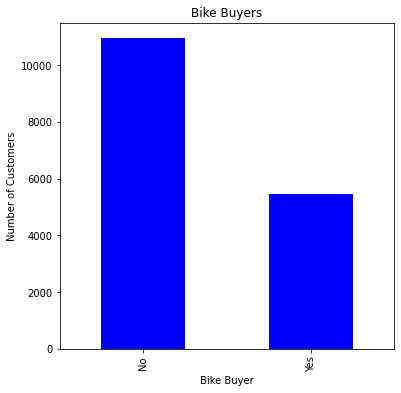

In [ ]:
def plot_bars(past_hist):
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = past_hist['BikeBuyer'].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Bike Buyers') # Give the plot a main title
        ax.set_xlabel('Bike Buyer') # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()

plot_bars(past_hist)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


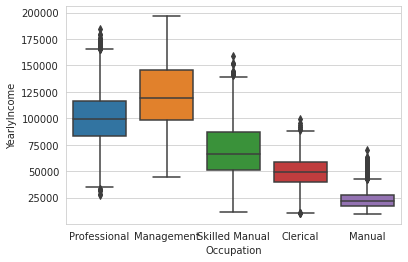

In [ ]:
def plot_box(cust_data,col,col_y = 'YearlyIncome'):
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=cust_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(cust_data,'Occupation')

Management sector has the highest median Yearly Income.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


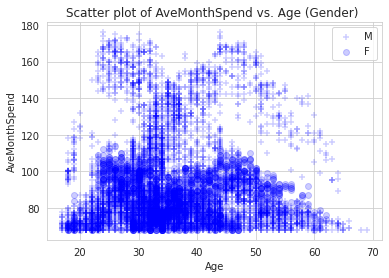

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


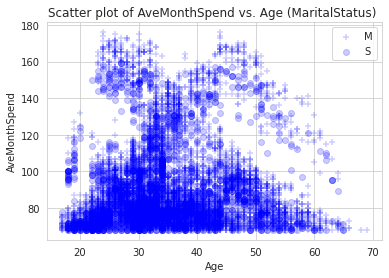

In [7]:
age = []  #Add age column
reference = date(1998,1,1)
cust_data['BirthDate'] = pd.to_datetime(cust_data['BirthDate'])
for x in cust_data['BirthDate']:
  a = reference.year - x.year - ((reference.month, reference.day) < (x.month, x.day))
  age.append(a)
cust_data['Age'] = age
cust_data['AveMonthSpend'] = month_spend['AveMonthSpend']
cust_data['BikeBuyer'] = past_hist['BikeBuyer']

medians = month_spend.median()

def plot_scatter_shape(cust_data, cols, shape_cols, medians,col_y = 'AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    for shape_col in shape_cols:
      unique_cats = cust_data[shape_col].unique()
      for col in cols: # loop over the columns to plot
          sns.set_style("whitegrid")
          for i, cat in enumerate(unique_cats): # loop over the unique categories
              temp = cust_data[(cust_data[shape_col] == cat) & (cust_data['AveMonthSpend'] >= medians['AveMonthSpend'])]
              sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,scatter_kws={"alpha":alpha},fit_reg = False, color = 'blue')
          plt.title('Scatter plot of ' + col_y + ' vs. ' + col + ' (' + shape_col +') ') # Give the plot a main title
          plt.xlabel(col) # Set text for the x axis
          plt.ylabel(col_y)# Set text for y axis
          plt.legend()
          plt.show()
shape_cols = ['Gender','MaritalStatus']            
cols = ['Age']
plot_scatter_shape(cust_data,cols,shape_cols, medians)

From plot 1, we can see that males between the ages 25-45 have high Average Month Spend

From plot 2 we can see that married men have high Average Month Spend

##CREATING A LINEAR REGRESSION MODEL

In [ ]:
cust_data.drop(['BikeBuyer'],axis=1)

In [9]:
cust_data.head()

,CustomerID,FirstName,MiddleName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend,BikeBuyer
0,11000,Jon,V,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,31,89,No
1,11001,Eugene,L,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,32,117,Yes
2,11002,Ruben,NaN,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,32,123,No
3,11003,Christy,NaN,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,29,50,No
4,11004,Elizabeth,NaN,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,29,95,Yes


In [ ]:
count = cust_data['TotalChildren'].value_counts()
print(count)

0    4244
2    3166
1    3054
4    2250
3    1977
5    1713
Name: TotalChildren, dtype: int64


In [10]:
Features = cust_data['Education']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)

ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()

def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['Occupation', 'Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren']

for col in categorical_columns:
    temp = encode_string(cust_data[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(16404, 33)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [11]:
Features = np.concatenate([Features, np.array(cust_data[['YearlyIncome','Age']])], axis = 1)
#Adding numeric features

In [30]:
nr.seed(100)
labels = np.array(cust_data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 50)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])


In [32]:
scaler = preprocessing.StandardScaler().fit(x_train[:,33:])
x_train[:,33:] = scaler.transform(x_train[:,33:])
x_test[:,33:] = scaler.transform(x_test[:,33:])
print(x_train.shape)
x_train[:5,:]

(16354, 35)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        , -0.56688935,  0.49450839],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.

In [33]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-7.30527549e+10 -7.30527549e+10 -7.30527549e+10 -7.30527549e+10
 -7.30527549e+10  9.88358505e+12  9.88358505e+12  9.88358505e+12
  9.88358505e+12  9.88358505e+12  2.10196683e+13  2.10196683e+13
  9.58258642e+12  9.58258642e+12 -4.41268814e+13 -4.41268814e+13
 -1.14510213e+12 -1.14510213e+12 -1.14510213e+12 -1.14510213e+12
 -1.14510213e+12 -7.67117982e+11 -7.67117982e+11 -7.67117982e+11
 -7.67117982e+11 -7.67117982e+11 -7.67117982e+11  5.62631451e+12
  5.62631451e+12  5.62631451e+12  5.62631451e+12  5.62631451e+12
  5.62631451e+12  8.60043335e+00 -1.58012915e+00]


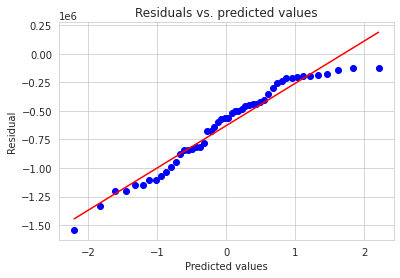

In [34]:
y_score = lin_mod.predict(x_test)
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

We see that residual values are almost close to the straight line and have fairly small residuals. It becomes big when the predicted values are negative

##PREPARING THE TEST DATA

In [17]:
test_data = pd.read_csv("AW_test.csv")

In [18]:
test_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [26]:
Age = []  #Add age column
reference = date(1998,1,1)
test_data['BirthDate'] = pd.to_datetime(test_data['BirthDate'])
for x in test_data['BirthDate']:
  a = reference.year - x.year - ((reference.month, reference.day) < (x.month, x.day))
  Age.append(a)
test_data['Age'] = Age
test_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,1945-01-05,Bachelors,Management,F,S,0,2,0,5,86931,52
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,1964-10-04,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,1934-01-12,Graduate Degree,Management,F,M,1,2,0,4,103985,63
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,1958-09-22,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,39
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,1965-03-19,High School,Manual,F,M,1,1,2,2,21876,32


In [39]:
#CREATING TEST MATRIX
features = test_data['Education']
enc = preprocessing.LabelEncoder()
enc.fit(features)
features = enc.transform(features)

ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(features.reshape(-1,1))
features = encoded.transform(features.reshape(-1,1)).toarray()

def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['Occupation', 'Gender','MaritalStatus','HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren']

for col in categorical_columns:
    temp = encode_string(test_data[col])
    features = np.concatenate([features, temp], axis = 1)

print(features.shape)
print(features[:2, :])

(500, 33)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [40]:
features = np.concatenate([features, np.array(test_data[['YearlyIncome','Age']])], axis = 1)
#Adding numeric features

In [44]:
scaler = preprocessing.StandardScaler().fit(features[:,33:])
features[:,33:] = scaler.transform(features[:,33:])

In [45]:
y_pred = lin_mod.predict(features)
print("Predicted response: \n",y_pred)

Predicted response: 
 [ 41.76269531 104.5493309   47.52287519  87.7484758   59.44736312
  43.12435582  93.72682501 127.06260268 102.96192543  56.17059016
  58.2924963   50.24635908  72.37975678  45.50908288  37.60508426
  50.34796106  85.03130323  73.16990448 113.02539062  57.78311835
  68.28484752  76.08814575 150.41992188  83.87619501  54.25195312
  73.86570884  86.38851419 114.3630983   77.02854049  61.32357854
  68.33542569  80.00731966  39.40484722  70.78808594 104.74857093
 103.19546981 149.9765625   91.52465852  58.33318192  86.87567509
  46.4980896   79.87385499  81.78431805  47.52754579  58.01031652
  75.04189317  60.30235905  85.53988419 115.18215026  79.72253316
  80.22293341  95.02070744  79.74342934  64.46154487  46.61095138
  76.17851559  57.10336585  74.58582789  63.81333203  69.96474224
  45.98560695  65.6174078   89.735342    80.61894727  43.76388386
  79.46161531  81.96407659 132.21397492  65.41271623 106.02486286
  83.36497687  67.62478106  92.21721293  44.22342069  

In [48]:
A={'CustomerID':test_data['CustomerID'], 'Prediction':y_pred}
final_result = pd.DataFrame(A)
final_result.head()

,CustomerID,Prediction
0,18988,41.762695
1,29135,104.549331
2,12156,47.522875
3,13749,87.748476
4,27780,59.447363


In [53]:
from google.colab import files
final_result.to_csv('Prediction.csv')
files.download('Prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>